In [102]:
#this is the code to select images from the same snapshot of the given list of simtypes
#and combine them into a single image.
#we would use the combined image of each snapshot from each simtypes to create a GIF
import sys
from PIL import Image
simtype=["fire2","sf-fire3","sf-fire3-alpha05","sf-fire3-alpha03"]
total_sims=len(simtype)
cols=2      #choose this manually
rows=total_sims//cols
rows=rows+total_sims%cols
#print(rows)
snapshot_start=677
snapshot_end=678
plot_folder_postfix="_plots_with_gas" #this is how folder names are similar
image_name_infix="_gas_and_clusters" #this is how image names are similar
total_snaps=snapshot_end-snapshot_start

for i in range (total_snaps): #do for all snapshot images
    images_to_combine=[]      #create a list of images to combine which would be a particular snapshot from all simtypes
    for j in range(total_sims):
        imagename="./"+simtype[j]+"/"+simtype[j]+plot_folder_postfix+"/"+simtype[j]+image_name_infix+str(i+snapshot_start)+".png"
        images_to_combine.append(imagename)
    #created the list of images to combine from each simtype for the given snapshot
    images = [Image.open(x) for x in images_to_combine]
    #opened the images and stored to a list images
    #print((images))
    widths, heights = zip(*(d.size for d in images)) # separting the width and height pair for each image 
    #images[0].size would give the dimension of the first image as (1556, 1061) 
    #this code takes the first values of the dimension of all images to widths and second value to heights
    print(widths)
    print(widths[1])
    #total_width = sum(widths) #total width of the combined image
    total_width = widths[0]+widths[1]
    max_height = max(heights)*rows #total height of the combined image
    new_im = Image.new('RGB', (total_width, max_height))
    y_offset=0  #it will determine the y position
    #print(y_offset)
    image_count=0
    for r in range(rows):
        x_offset =0 #it will determine the xposition
        for c in range(cols):
            #print("c is:",c)
            new_im.paste(images[image_count], (x_offset,y_offset)) #put each image to given location
            x_offset += images[image_count].size[0] #shifting the x position for the colum
            #print("image_count is:",image_count)
            image_count+=1        
        y_offset= images[image_count-1].size[1] #y position shifed only once (may need edit)
    combined_im_name="2x2fire2_sffire3_alpha_3and5_combined"+str(i+snapshot_start)+".png"
    print("Created a combined image and saved as:",combined_im_name,end="\r",flush=True)
    combined_im_path="./GIFs/"
    new_im.save(combined_im_path+combined_im_name) #saved the combined image

(1237, 1058, 1237, 1058)
1058


In [50]:
#this is the code to select images from the same snapshot of the given list of simtypes
#and combine them into a single image.
#we would use the combined image of each snapshot from each simtypes to create a GIF
import sys
from PIL import Image
print("hello")
simtype=["sf-fire3-alpha01","sf-fire3-alpha03","sf-fire3-alpha05"]
total_sims=len(simtype)
cols=3      #choose this manually
rows=total_sims//cols
rows=rows+total_sims%cols
#print(rows)
snapshot_start=677
snapshot_end=678
plot_folder_postfix="_plots_with_gas" #this is how folder names are similar
image_name_infix="_gas_and_clusters" #this is how image names are similar
total_snaps=snapshot_end-snapshot_start

for i in range (total_snaps): #do for all snapshot images
    images_to_combine=[]      #create a list of images to combine which would be a particular snapshot from all simtypes
    for j in range(total_sims):
        imagename="./"+simtype[j]+"/"+simtype[j]+plot_folder_postfix+"/"+simtype[j]+image_name_infix+str(i+snapshot_start)+".png"
        images_to_combine.append(imagename)
    #created the list of images to combine from each simtype for the given snapshot
    images = [Image.open(x) for x in images_to_combine]
    #opened the images and stored to a list images
    #print((images))
    widths, heights = zip(*(d.size for d in images)) # separting the width and height pair for each image 
    #images[0].size would give the dimension of the image as (1556, 1061) 
    #this code takes the first values of the dimension of all images to widths and second value to heights
    #print(widths)
    total_width = sum(widths) #total width of the combined image
    max_height = max(heights) #total height of the combined image
    new_im = Image.new('RGB', (total_width, max_height))
    y_offset=0  #it will determine the y position
    #print(y_offset)
    image_count=0
    for r in range(rows):
        x_offset =0 #it will determine the xposition
        for c in range(cols):
            #print("c is:",c)
            new_im.paste(images[image_count], (x_offset,y_offset)) #put each image to given location
            x_offset += images[image_count].size[0] #shifting the x position for the colum
            #print("image_count is:",image_count)
            image_count+=1        
        y_offset= images[image_count-1].size[1] #y position shifed only once (may need edit)
    combined_im_name="sf_alpha_1_3_5combined"+str(i+snapshot_start)+".png"
    print("Created a combined image and saved as:",combined_im_name,end="\r",flush=True)
    combined_im_path="./GIFs/"
    new_im.save(combined_im_path+combined_im_name) #saved the combined image

hello


This section is to read data from particular snapshot of the selected sims and create a plot for that particular snapshot with all the sims we want.


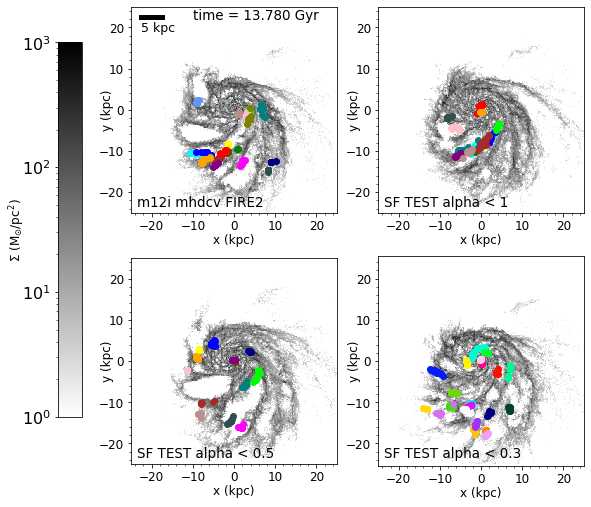

In [162]:
import sys
import pickle
import numpy as np
import numpy
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rc('text', usetex=False)



simtype=["fire2","sf-fire3","sf-fire3-alpha03","sf-fire3-alpha05"]
total_sims=len(simtype)
cols=2      #choose this manually
rows=total_sims//cols
rows=rows+total_sims%cols
#print(rows)
snapshot_start=596
snapshot_end=597
gas_data_folder_postfix="_gas_data_pkl" #this is how folder names are similar
cluster_data_postfix="_data_pkl" #this is how image names are similar
total_snaps=snapshot_end-snapshot_start
snap=677




#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.
bins = np.arange(-25,25,0.1)
#############################################################################
#constants
#############################################################################


fire2_cluster_data_path="./fire2/fire2_data_pkl/all_clusters_at_snapshot_"+str(snap)+".pkl"
fire2_gas_data_path="./fire2/fire2_gas_data_pkl/fire2_gas_data"+str(snap)+".pkl"

fire3sf_cluster_data_path="./sf-fire3/sf-fire3data_pkl/sf-fire3_clusters_at_snapshot_"+str(snap)+".pkl"
fire3sf_gas_data_path="./sf-fire3/sf-fire3_gas_data_pkl/sf-fire3_gas_data"+str(snap)+".pkl"

sfalpha03_cluster_data_path="./sf-fire3-alpha03/sf-fire3-alpha03_data_pkl/sf-fire3-alpha03_clusters_at_snapshot_"+str(snap)+".pkl"
sfalpha03_gas_data_path="./sf-fire3-alpha03/sf-fire3-alpha03_gas_data_pkl/sf-fire3-alpha03_gas_data"+str(snap)+".pkl"

sfalpha05_cluster_data_path="./sf-fire3-alpha05/sf-fire3-alpha05_data_pkl/sf-fire3-alpha05_clusters_at_snapshot_"+str(snap)+".pkl"
sfalpha05_gas_data_path="./sf-fire3-alpha05/sf-fire3-alpha05_gas_data_pkl/sf-fire3-alpha05_gas_data"+str(snap)+".pkl"

with open(fire2_cluster_data_path, "rb") as input:
    fire2_clusters = pickle.load(input)
with open(fire2_gas_data_path, "rb") as input:
    fire2_gas = pickle.load(input)
####################################    
with open(fire3sf_cluster_data_path, "rb") as input:
    sffire3_clusters = pickle.load(input)
with open(fire3sf_gas_data_path, "rb") as input:
    sffire3_gas = pickle.load(input)
######################################
with open(sfalpha03_cluster_data_path, "rb") as input:
    sfalpha03_clusters = pickle.load(input)
with open(sfalpha03_gas_data_path, "rb") as input:
    sfalpha03_gas = pickle.load(input)
######################################
with open(sfalpha05_cluster_data_path, "rb") as input:
    sfalpha05_clusters = pickle.load(input)
with open(sfalpha05_gas_data_path, "rb") as input:
    sfalpha05_gas = pickle.load(input)
######################################



fig1=plt.figure()
fig1.set_size_inches(8.5,8)
#gs = fig1.add_gridspec(ncols=2, nrows=2)
fig1.subplots_adjust(left=0.16,right=0.9,bottom=0.1,top=0.9)
#gs=GridSpec(2,2)
#################################################
#################################################
################## FIRE2 ########################
total_clusters=len(fire2_clusters)
#cmap = plt.get_cmap("gist_ncar")
#colors = iter(cmap(np.linspace(0,1,total_clusters))) #number of clusters
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
clustermass=[]   #it stores the mass of each cluster that was in the beginning
for c in range(total_clusters):
    m=np.sum(fire2_clusters[c+1]["mass_tracked"])
    clustermass.append(m)

ax1=fig1.add_subplot(2,2,1)
#ax=fig1.add_axes([0.17, 0.185, 0.65, 0.65]) #left, bottom, width, height
cluster_count=0 
for j in range(total_clusters):  #total_clusters tells us how many clusters to look for
        
    x=fire2_clusters[cluster_count+1]["x_tracked"]
    y=fire2_clusters[cluster_count+1]["y_tracked"]
    s1=ax1.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=colors[cluster_count]) #use this if no. of clusters is large
    ax1.minorticks_on()
    ax1.tick_params(labelsize=12)
    ax1.set_xlabel("x (kpc)",fontsize=12,labelpad=1)
    ax1.set_ylabel("y (kpc)",fontsize=12,labelpad=-15)
    cluster_count+=1

##################
##################

v=fire2_gas["v"]
face=fire2_gas["face"]
xh=fire2_gas["xh"]
yh=fire2_gas["yh"]
snaptime=fire2_gas["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
im = ax1.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 
    

#colorbar for the background gas density
cmap_gray = matplotlib.cm.get_cmap('binary')
norm1 = matplotlib.colors.LogNorm(vmin=1,vmax=1000)
cbar_ax1 = fig1.add_axes([0.04, 0.185, 0.04, 0.65]) # position of gray colorbar (left, bottom, width, height)
cb1 = fig1.colorbar(im, cax=cbar_ax1, ticklocation='left')
cb1.set_label('$\Sigma$ (M$_{{\odot}}$/pc$^2$)', labelpad=-5, fontsize=12)
    
#plot a scale bar 5 kpc long
ax1.plot([-22.5,-17.5], [22.5,22.5], 'k-', linewidth=5)
label1 = "5 kpc"
ax1.text(-22.5, 19, label1, fontsize=12.5)
    
#label the name of the galaxy on plot 
label2="m12i mhdcv FIRE2" 
ax1.text(-23.5,-23.5,label2,fontsize=13.5) 
    
#label the time from the snapshot_times.txt file
label3 = 'time = ' + f'{snaptime:.3f}' + ' Gyr'
ax1.text(-10,22,label3,fontsize=13.5)

################## FIRE2 #################
##########################################
##########################################


#################################################
#################################################
################## SF FIRE3 #####################
total_clusters=len(sffire3_clusters)
#cmap = plt.get_cmap("gist_ncar")
#colors = iter(cmap(np.linspace(0,1,total_clusters))) #number of clusters
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
clustermass=[]   #it stores the mass of each cluster that was in the beginning
for c in range(total_clusters):
    m=np.sum(sffire3_clusters[c+1]["mass_tracked"])
    clustermass.append(m)

#ax1=fig1.add_subplot(2,2,2) gs[0,0]
ax2=fig1.add_subplot(2,2,2)
#ax=fig1.add_axes([0.17, 0.185, 0.65, 0.65]) #left, bottom, width, height
cluster_count=0 
for j in range(total_clusters):  #total_clusters tells us how many clusters to look for
        
    x=sffire3_clusters[cluster_count+1]["x_tracked"]
    y=sffire3_clusters[cluster_count+1]["y_tracked"]
    s1=ax2.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=colors[cluster_count]) #use this if no. of clusters is large
    ax2.minorticks_on()
    ax2.tick_params(labelsize=12)
    ax2.set_xlabel("x (kpc)",fontsize=12,labelpad=1)
    ax2.set_ylabel("y (kpc)",fontsize=12,labelpad=-15)
    cluster_count+=1

##################
##################

v=sffire3_gas["v"]
face=sffire3_gas["face"]
xh=sffire3_gas["xh"]
yh=sffire3_gas["yh"]
snaptime=sffire3_gas["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
im = ax2.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 
        
#label the name of the galaxy on plot 
label2="SF TEST alpha < 1" 
ax2.text(-23.5,-23.5,label2,fontsize=13.5) 
    
################## SF FIRE3 ##############
##########################################
##########################################




#################################################
##################################################
################## SF FIRE3 ALPHA 05 #############
total_clusters=len(sfalpha05_clusters)
#cmap = plt.get_cmap("gist_ncar")
#colors = iter(cmap(np.linspace(0,1,total_clusters))) #number of clusters
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
clustermass=[]   #it stores the mass of each cluster that was in the beginning
for c in range(total_clusters):
    m=np.sum(sfalpha05_clusters[c+1]["mass_tracked"])
    clustermass.append(m)

ax3=fig1.add_subplot(2,2,3)
#ax=fig1.add_axes([0.17, 0.185, 0.65, 0.65]) #left, bottom, width, height
cluster_count=0 
for j in range(total_clusters):  #total_clusters tells us how many clusters to look for
        
    x=sfalpha05_clusters[cluster_count+1]["x_tracked"]
    y=sfalpha05_clusters[cluster_count+1]["y_tracked"]
    s1=ax3.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=colors[cluster_count]) #use this if no. of clusters is large
    ax3.minorticks_on()
    ax3.tick_params(labelsize=12)
    ax3.set_xlabel("x (kpc)",fontsize=12,labelpad=1)
    ax3.set_ylabel("y (kpc)",fontsize=12,labelpad=-15)
    cluster_count+=1

##################
##################

v=sfalpha05_gas["v"]
face=sfalpha05_gas["face"]
xh=sfalpha05_gas["xh"]
yh=sfalpha05_gas["yh"]
snaptime=sfalpha05_gas["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
im = ax3.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 
    

#colorbar for the background gas density
cmap_gray = matplotlib.cm.get_cmap('binary')
norm1 = matplotlib.colors.LogNorm(vmin=1,vmax=1000)
#cbar_ax1 = fig1.add_axes([0.04, 0.185, 0.04, 0.65]) # position of gray colorbar (left, bottom, width, height)
#cb1 = fig1.colorbar(im, cax=cbar_ax1, ticklocation='left')
#cb1.set_label('$\Sigma$ (M$_{{\odot}}$/pc$^2$)', labelpad=-5, fontsize=12)
        
#label the name of the galaxy on plot 
label2="SF TEST alpha < 0.5" 
ax3.text(-23.5,-23.5,label2,fontsize=13.5) 
    

################## SF FIRE3 ALPHA 05 #####
##########################################
##########################################


#################################################
#################################################
################## SF FIRE3 ALPHA 03 ############

total_clusters=len(sfalpha03_clusters)
cmap = plt.get_cmap("gist_ncar")
colors = iter(cmap(np.linspace(0,1,total_clusters))) #number of clusters
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
clustermass=[]   #it stores the mass of each cluster that was in the beginning
for c in range(total_clusters):
    m=np.sum(sfalpha03_clusters[c+1]["mass_tracked"])
    clustermass.append(m)

ax4=fig1.add_subplot(2,2,4)
#ax=fig1.add_axes([0.17, 0.185, 0.65, 0.65]) #left, bottom, width, height
cluster_count=0 
for j in range(total_clusters):  #total_clusters tells us how many clusters to look for
        
    x=sfalpha03_clusters[cluster_count+1]["x_tracked"]
    y=sfalpha03_clusters[cluster_count+1]["y_tracked"]
    s1=ax4.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=next(colors).reshape(1,-1)) #use this if no. of clusters is large
    ax4.minorticks_on()
    ax4.tick_params(labelsize=12)
    ax4.set_xlabel("x (kpc)",fontsize=12,labelpad=1)
    ax4.set_ylabel("y (kpc)",fontsize=12,labelpad=-15)
    cluster_count+=1

##################
##################

v=sfalpha03_gas["v"]
face=sfalpha03_gas["face"]
xh=sfalpha03_gas["xh"]
yh=sfalpha03_gas["yh"]
snaptime=sfalpha03_gas["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
im = ax4.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 
        
#label the name of the galaxy on plot 
label2="SF TEST alpha < 0.3" 
ax4.text(-23.5,-23.5,label2,fontsize=13.5) 
    
################## SF FIRE3 ALPHA 03 #####
##########################################
##########################################


#plt.tight_layout()
plt.axis('tight')
plt.axis('equal')
#fig1.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
fig1.savefig("2by2"+str(snap)+".png",bbox_inches = 'tight')


